In [307]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [308]:
combinado2018 = pd.read_csv('data/tablas/combinado2018.csv', sep=';')

In [309]:
# PROM_GRAL change , for . the datatyope is float
combinado2018['PROM_GRAL'] = combinado2018['PROM_GRAL'].str.replace(',', '.').astype(float)

In [310]:
# Convertir 'FEC_NAC_ALU' a una cadena
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].astype(str)

# Asegurarse de que la cadena tiene el formato correcto (YYYYMM)
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].str.pad(width=6, side='left', fillchar='0')

# Convertir la cadena a un formato de fecha
combinado2018['FEC_NAC_ALU'] = pd.to_datetime(combinado2018['FEC_NAC_ALU'], format='%Y%m')

print(combinado2018['FEC_NAC_ALU'])

0         2001-04-01
1         2000-04-01
2         2001-09-01
3         2001-05-01
4         2001-07-01
             ...    
2893195   2002-07-01
2893196   2003-03-01
2893197   2001-11-01
2893198   2002-08-01
2893199   2003-06-01
Name: FEC_NAC_ALU, Length: 2893200, dtype: datetime64[ns]


In [311]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 39 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   AGNO            int64         
 2   RBD             int64         
 3   DGV_RBD         int64         
 4   NOM_RBD         object        
 5   COD_REG_RBD     int64         
 6   NOM_REG_RBD_A   object        
 7   COD_PRO_RBD     int64         
 8   COD_COM_RBD     int64         
 9   NOM_COM_RBD     object        
 10  COD_DEPROV_RBD  int64         
 11  NOM_DEPROV_RBD  object        
 12  COD_DEPE        int64         
 13  COD_DEPE2       int64         
 14  RURAL_RBD       int64         
 15  ESTADO_ESTAB    int64         
 16  COD_ENSE        int64         
 17  COD_ENSE2       int64         
 18  COD_GRADO       int64         
 19  LET_CUR         object        
 20  COD_JOR         int64         
 21  COD_TIP_CUR     int64         
 22  COD_DES_CUR     in

In [312]:
# Drop Unnamed: 0      
combinado2018 = combinado2018.drop(['Unnamed: 0'], axis=1)

In [313]:
# Drop "NOM_RBD", "NOM_REG_RBD_A", "NOM_COM_RBD", "NOM_DEPROV_RBD", "LET_CUR", "NOM_COM_ALU", "SIT_FIN"
combinado2018 = combinado2018.drop(["NOM_RBD", "NOM_REG_RBD_A", "NOM_COM_RBD", "NOM_DEPROV_RBD", "LET_CUR", "NOM_COM_ALU", "SIT_FIN" ], axis=1)

In [314]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 31 columns):
 #   Column          Dtype         
---  ------          -----         
 0   AGNO            int64         
 1   RBD             int64         
 2   DGV_RBD         int64         
 3   COD_REG_RBD     int64         
 4   COD_PRO_RBD     int64         
 5   COD_COM_RBD     int64         
 6   COD_DEPROV_RBD  int64         
 7   COD_DEPE        int64         
 8   COD_DEPE2       int64         
 9   RURAL_RBD       int64         
 10  ESTADO_ESTAB    int64         
 11  COD_ENSE        int64         
 12  COD_ENSE2       int64         
 13  COD_GRADO       int64         
 14  COD_JOR         int64         
 15  COD_TIP_CUR     int64         
 16  COD_DES_CUR     int64         
 17  MRUN            int64         
 18  GEN_ALU         int64         
 19  FEC_NAC_ALU     datetime64[ns]
 20  EDAD_ALU        int64         
 21  COD_REG_ALU     int64         
 22  COD_COM_ALU     in

In [315]:
# Crear nuevas columnas para el año y el mes
combinado2018['AGNO_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].dt.year
combinado2018['MES_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].dt.month

# Eliminar la columna del día
combinado2018['FEC_NAC_ALU'] = combinado2018['FEC_NAC_ALU'].dt.to_period('M')

In [316]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 33 columns):
 #   Column          Dtype    
---  ------          -----    
 0   AGNO            int64    
 1   RBD             int64    
 2   DGV_RBD         int64    
 3   COD_REG_RBD     int64    
 4   COD_PRO_RBD     int64    
 5   COD_COM_RBD     int64    
 6   COD_DEPROV_RBD  int64    
 7   COD_DEPE        int64    
 8   COD_DEPE2       int64    
 9   RURAL_RBD       int64    
 10  ESTADO_ESTAB    int64    
 11  COD_ENSE        int64    
 12  COD_ENSE2       int64    
 13  COD_GRADO       int64    
 14  COD_JOR         int64    
 15  COD_TIP_CUR     int64    
 16  COD_DES_CUR     int64    
 17  MRUN            int64    
 18  GEN_ALU         int64    
 19  FEC_NAC_ALU     period[M]
 20  EDAD_ALU        int64    
 21  COD_REG_ALU     int64    
 22  COD_COM_ALU     int64    
 23  COD_RAMA        int64    
 24  COD_SEC         int64    
 25  COD_ESPE        int64    
 26  PROM_GRAL     

In [317]:
combinado2018['FEC_NAC_ALU']

0          2001-04
1          2000-04
2          2001-09
3          2001-05
4          2001-07
            ...   
2893195    2002-07
2893196    2003-03
2893197    2001-11
2893198    2002-08
2893199    2003-06
Name: FEC_NAC_ALU, Length: 2893200, dtype: period[M]

In [318]:
# Drop FEC_NAC_ALU
combinado2018 = combinado2018.drop(['FEC_NAC_ALU'], axis=1)

In [319]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 32 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AGNO            int64  
 1   RBD             int64  
 2   DGV_RBD         int64  
 3   COD_REG_RBD     int64  
 4   COD_PRO_RBD     int64  
 5   COD_COM_RBD     int64  
 6   COD_DEPROV_RBD  int64  
 7   COD_DEPE        int64  
 8   COD_DEPE2       int64  
 9   RURAL_RBD       int64  
 10  ESTADO_ESTAB    int64  
 11  COD_ENSE        int64  
 12  COD_ENSE2       int64  
 13  COD_GRADO       int64  
 14  COD_JOR         int64  
 15  COD_TIP_CUR     int64  
 16  COD_DES_CUR     int64  
 17  MRUN            int64  
 18  GEN_ALU         int64  
 19  EDAD_ALU        int64  
 20  COD_REG_ALU     int64  
 21  COD_COM_ALU     int64  
 22  COD_RAMA        int64  
 23  COD_SEC         int64  
 24  COD_ESPE        int64  
 25  PROM_GRAL       float64
 26  ASISTENCIA      int64  
 27  SIT_FIN_R       object 
 28  DESERTOR    

In [320]:
combinado2018['SIT_FIN_R'].unique()

array(['R', 'T', 'Y', 'P', ' '], dtype=object)

In [321]:
combinado2018['SIT_FIN_R'].value_counts()

SIT_FIN_R
P    2569757
T     189897
R      79319
Y      53805
         422
Name: count, dtype: int64

In [322]:
# Eliminar valores nulos de 'SIT_FIN_R'
combinado2018 = combinado2018.dropna(subset=['SIT_FIN_R'])

In [323]:
combinado2018['SIT_FIN_R'].unique()

array(['R', 'T', 'Y', 'P', ' '], dtype=object)

In [324]:
import numpy as np

combinado2018['SIT_FIN_R'].replace(' ', np.nan, inplace=True)

In [325]:
most_common = combinado2018['SIT_FIN_R'].mode()[0]
combinado2018['SIT_FIN_R'] = combinado2018['SIT_FIN_R'].fillna(most_common)

In [326]:
combinado2018['SIT_FIN_R'] = combinado2018['SIT_FIN_R'].fillna('Unknown')

In [327]:
# Verificar valores nulos
combinado2018.isnull().sum()

AGNO                  0
RBD                   0
DGV_RBD               0
COD_REG_RBD           0
COD_PRO_RBD           0
COD_COM_RBD           0
COD_DEPROV_RBD        0
COD_DEPE              0
COD_DEPE2             0
RURAL_RBD             0
ESTADO_ESTAB          0
COD_ENSE              0
COD_ENSE2             0
COD_GRADO             0
COD_JOR               0
COD_TIP_CUR           0
COD_DES_CUR           0
MRUN                  0
GEN_ALU               0
EDAD_ALU              0
COD_REG_ALU           0
COD_COM_ALU           0
COD_RAMA              0
COD_SEC               0
COD_ESPE              0
PROM_GRAL             0
ASISTENCIA            0
SIT_FIN_R             0
DESERTOR              0
COD_MEN           79315
AGNO_NAC_ALU          0
MES_NAC_ALU           0
dtype: int64

In [328]:
# Drop COD_MEN
combinado2018 = combinado2018.drop(['COD_MEN'], axis=1)

In [329]:
# Dummies  de variable SIT_FIN_R
combinado2018 = pd.get_dummies(combinado2018, columns=['SIT_FIN_R'])

In [330]:
combinado2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893200 entries, 0 to 2893199
Data columns (total 34 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AGNO            int64  
 1   RBD             int64  
 2   DGV_RBD         int64  
 3   COD_REG_RBD     int64  
 4   COD_PRO_RBD     int64  
 5   COD_COM_RBD     int64  
 6   COD_DEPROV_RBD  int64  
 7   COD_DEPE        int64  
 8   COD_DEPE2       int64  
 9   RURAL_RBD       int64  
 10  ESTADO_ESTAB    int64  
 11  COD_ENSE        int64  
 12  COD_ENSE2       int64  
 13  COD_GRADO       int64  
 14  COD_JOR         int64  
 15  COD_TIP_CUR     int64  
 16  COD_DES_CUR     int64  
 17  MRUN            int64  
 18  GEN_ALU         int64  
 19  EDAD_ALU        int64  
 20  COD_REG_ALU     int64  
 21  COD_COM_ALU     int64  
 22  COD_RAMA        int64  
 23  COD_SEC         int64  
 24  COD_ESPE        int64  
 25  PROM_GRAL       float64
 26  ASISTENCIA      int64  
 27  DESERTOR        int64  
 28  AGNO_NAC_ALU

In [331]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [332]:
X = combinado2018.drop('DESERTOR', axis=1)
y = combinado2018['DESERTOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [333]:
numeric_features = ['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE','EDAD_ALU', 'PROM_GRAL', 'ASISTENCIA','AGNO_NAC_ALU', 'MES_NAC_ALU']  
categorical_features = ['SIT_FIN_R_P', 'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y']  

In [334]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [335]:
X.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
       'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y'],
      dtype='object')

In [336]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [337]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025240 entries, 1381675 to 2219110
Data columns (total 33 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AGNO            int64  
 1   RBD             int64  
 2   DGV_RBD         int64  
 3   COD_REG_RBD     int64  
 4   COD_PRO_RBD     int64  
 5   COD_COM_RBD     int64  
 6   COD_DEPROV_RBD  int64  
 7   COD_DEPE        int64  
 8   COD_DEPE2       int64  
 9   RURAL_RBD       int64  
 10  ESTADO_ESTAB    int64  
 11  COD_ENSE        int64  
 12  COD_ENSE2       int64  
 13  COD_GRADO       int64  
 14  COD_JOR         int64  
 15  COD_TIP_CUR     int64  
 16  COD_DES_CUR     int64  
 17  MRUN            int64  
 18  GEN_ALU         int64  
 19  EDAD_ALU        int64  
 20  COD_REG_ALU     int64  
 21  COD_COM_ALU     int64  
 22  COD_RAMA        int64  
 23  COD_SEC         int64  
 24  COD_ESPE        int64  
 25  PROM_GRAL       float64
 26  ASISTENCIA      int64  
 27  AGNO_NAC_ALU    int32  
 28  MES_NAC_ALU

In [338]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 2025240 entries, 1381675 to 2219110
Series name: DESERTOR
Non-Null Count    Dtype
--------------    -----
2025240 non-null  int64
dtypes: int64(1)
memory usage: 30.9 MB


In [339]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGNO', 'RBD', 'DGV_RBD',
                                                   'COD_REG_RBD', 'COD_PRO_RBD',
                                                   'COD_COM_RBD',
                                                   'COD_DEPROV_RBD', 'COD_DEPE',
                                                   'COD_DEPE2', 'RURAL_RBD',
                                                   'ESTADO_ESTAB', 'COD_ENSE',
                                                   'COD_ENSE2', 'COD_GRADO',
                                                   'COD_JOR', 'COD_TIP_CUR',
                                                   'COD_DES_CUR', 'MRUN',
                                                   'GEN_ALU', 'COD_REG_ALU',
                                                   'COD_COM_ALU', 'COD_RAMA',
                                                   'COD_SEC', 'COD_ESPE',
                                                   'EDAD_ALU', 'PROM_GRAL',
                                                   'ASISTENCIA', 'AGNO_NAC_ALU',
                                                   'MES_NAC_ALU']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SIT_FIN_R_P', 'SIT_FIN_R_R',
                                                   'SIT_FIN_R_T',
                                                   'SIT_FIN_R_Y'])])),
                ('classifier', RandomForestClassifier())])

In [340]:
import matplotlib.pyplot as plt

In [341]:
X_train.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
       'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y'],
      dtype='object')

In [342]:
X_test.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
       'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y'],
      dtype='object')

In [344]:
# Prediccion
y_pred = clf.predict(X_test)

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificacion
print(classification_report(y_test, y_pred))



[[844603      0]
 [     0  23357]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    844603
           1       1.00      1.00      1.00     23357

    accuracy                           1.00    867960
   macro avg       1.00      1.00      1.00    867960
weighted avg       1.00      1.00      1.00    867960



In [346]:
# Importancia de las variables
feature_names = X.columns
importances = clf.named_steps['classifier'].feature_importances_

In [350]:
print(clf.named_steps['classifier'])

RandomForestClassifier()


In [351]:
print(clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGNO', 'RBD', 'DGV_RBD',
                                                   'COD_REG_RBD', 'COD_PRO_RBD',
                                                   'COD_COM_RBD',
                                                   'COD_DEPROV_RBD', 'COD_DEPE',
                                                   'COD_DEPE2', 'RURAL_RBD',
                                                   'ESTADO_ESTAB', 'COD_ENSE',
                                                   'COD_ENSE2', 'COD_GRADO',
                                                   'COD_JOR', 'COD_TIP_CUR',
                                                   'COD_DES_CUR', 'MRUN',
                                                   'GEN_ALU', 'COD_REG_ALU',
                                                   'COD_COM_ALU', 'COD_RAMA',
                                                

In [355]:
print(clf.named_steps['classifier'].feature_importances_)

[7.39963121e-01 2.44877094e-03 1.17090981e-03 4.60112581e-04
 8.45264620e-04 1.47916216e-03 1.15510763e-03 9.95077676e-04
 8.53401538e-04 1.71603714e-04 1.63627021e-04 3.17526510e-03
 3.81284378e-03 1.18404820e-02 3.98446552e-04 8.06306852e-05
 4.34165600e-04 1.98391145e-02 3.96084378e-04 5.24032593e-04
 1.64087444e-03 4.12165534e-04 4.35013540e-04 6.43635121e-04
 3.46745767e-02 8.81747804e-03 9.54568982e-03 5.36472944e-02
 5.50797803e-03 1.22712855e-02 1.55872461e-02 2.64104803e-03
 3.80037903e-03 2.92069791e-03 2.21373112e-03 2.74648499e-02
 2.75688334e-02]


In [347]:
print(importances)
print(feature_names)

[7.39963121e-01 2.44877094e-03 1.17090981e-03 4.60112581e-04
 8.45264620e-04 1.47916216e-03 1.15510763e-03 9.95077676e-04
 8.53401538e-04 1.71603714e-04 1.63627021e-04 3.17526510e-03
 3.81284378e-03 1.18404820e-02 3.98446552e-04 8.06306852e-05
 4.34165600e-04 1.98391145e-02 3.96084378e-04 5.24032593e-04
 1.64087444e-03 4.12165534e-04 4.35013540e-04 6.43635121e-04
 3.46745767e-02 8.81747804e-03 9.54568982e-03 5.36472944e-02
 5.50797803e-03 1.22712855e-02 1.55872461e-02 2.64104803e-03
 3.80037903e-03 2.92069791e-03 2.21373112e-03 2.74648499e-02
 2.75688334e-02]
Index(['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR',
       'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU',
       'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL',
       'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P',
 

In [356]:
feature_names = ['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'COD_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'AGNO_NAC_ALU', 'MES_NAC_ALU', 'SIT_FIN_R_P', 'SIT_FIN_R_R', 'SIT_FIN_R_T', 'SIT_FIN_R_Y', '34', '35', '36', '37']

In [357]:

forest_importances = pd.Series(importances, index=feature_names)

In [358]:
print(forest_importances)

AGNO              0.739963
RBD               0.002449
DGV_RBD           0.001171
COD_REG_RBD       0.000460
COD_PRO_RBD       0.000845
COD_COM_RBD       0.001479
COD_DEPROV_RBD    0.001155
COD_DEPE          0.000995
COD_DEPE2         0.000853
RURAL_RBD         0.000172
ESTADO_ESTAB      0.000164
COD_ENSE          0.003175
COD_ENSE2         0.003813
COD_GRADO         0.011840
COD_JOR           0.000398
COD_TIP_CUR       0.000081
COD_DES_CUR       0.000434
MRUN              0.019839
GEN_ALU           0.000396
EDAD_ALU          0.000524
COD_REG_ALU       0.001641
COD_COM_ALU       0.000412
COD_RAMA          0.000435
COD_SEC           0.000644
COD_ESPE          0.034675
PROM_GRAL         0.008817
ASISTENCIA        0.009546
AGNO_NAC_ALU      0.053647
MES_NAC_ALU       0.005508
SIT_FIN_R_P       0.012271
SIT_FIN_R_R       0.015587
SIT_FIN_R_T       0.002641
SIT_FIN_R_Y       0.003800
34                0.002921
35                0.002214
36                0.027465
37                0.027569
d

"\n# Guardar grafico\nplt.savefig('graficos/variables_importancia.png')\n\n# Guardar modelo\nimport pickle\npickle.dump(clf, open('modelos/modelo.pkl', 'wb'))\n"

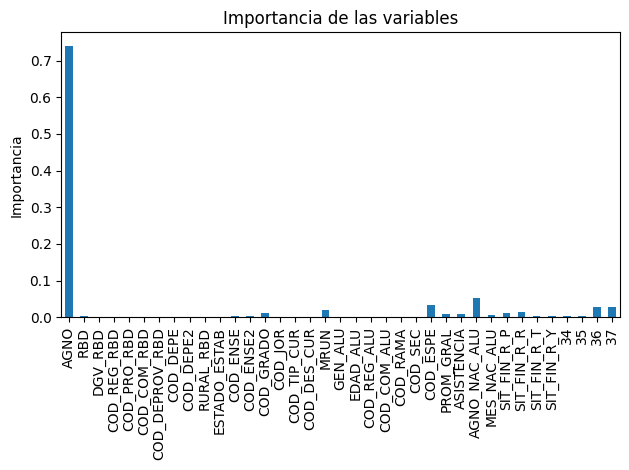

In [359]:


# Grafico de barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las variables")
ax.set_ylabel("Importancia")
fig.tight_layout()

'''
# Guardar grafico
plt.savefig('graficos/variables_importancia.png')

# Guardar modelo
import pickle
pickle.dump(clf, open('modelos/modelo.pkl', 'wb'))
'''

In [ ]:
# Regresion logistica
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)

# Prediccion
y_pred = clf.predict(X_test)

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificacion
print(classification_report(y_test, y_pred))

# Importancia de las variables
feature_names = X.columns
importances = clf.named_steps['classifier'].coef_[0]
forest_importances = pd.Series(importances, index=feature_names)

# Grafico de barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las variables")
ax.set_ylabel("Importancia")
fig.tight_layout()


In [ ]:
# Redes neuronales
from sklearn.neural_network import MLPClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MLPClassifier())])

clf.fit(X_train, y_train)

# Prediccion
y_pred = clf.predict(X_test)

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificacion
print(classification_report(y_test, y_pred))

# Importancia de las variables
feature_names = X.columns
importances = clf.named_steps['classifier'].coefs_[0]
forest_importances = pd.Series(importances, index=feature_names)

# Grafico de barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las variables")
ax.set_ylabel("Importancia")
fig.tight_layout()
